# 2. 분선분석(ANOVA)
## 1) 일원분산분석(One-wqy ANOVA)
 - 3개 이상의 범주를 갖는 하나의 실험 요인(독립변수)에 대한 하나의 종속변수의 평균 차이를 검정하는 분석
 - stats.f_oneway() : scipy f 통계량
 - statsmodels.stats.anova() : stats 모델 anova

### 증명하고자 하는 가설
 - 4개의 각기 다른 신입사원 교육훈련 기법의 효과성을 평가하고자 한다. 새로 입사한 32명의 신입사원에게 4개 교육 기관에서 다른 학습 방법을 적용 시켰다. 한 달 간의 훈련기간이 끝난 후 시험을 쳤는데 그 점수는 아래와 같다. 4개의 교육훈련 기법 간 차이가 있는가? 만약있다면 어떻게 다른가?
 
 -> 4개 이상의 대응표본을 비교해야 하므로 일원배치 분산분석 기법을 사용해야 한다.
 
 귀무가설 : 4개의 교육훈련 기법 간의 차이가 없다.
 대립가설 : 4개의 교육훈련 기법 간의 차이가 있다.

In [3]:
import os
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [4]:
# 데이터셋
a = [66,74,82,75,74,97,87,78]
b = [72,51,59,62,74,64,78,63]
c = [61,60,57,69,81,77,70,71]
d = [63,61,76,84,58,65,69,80]
print("a 평균 :", np.mean(a))
print("b 평균 :", np.mean(b))
print("c 평균 :", np.mean(c))
print("d 평균 :", np.mean(d))

a 평균 : 79.125
b 평균 : 65.375
c 평균 : 68.25
d 평균 : 69.5


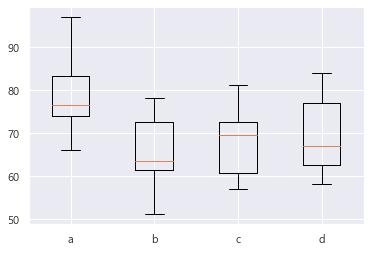

In [5]:
# 이상값 확인
plot_data = [a, b, c, d]
plt.boxplot(plot_data)
plt.xticks([1,2,3,4], ['a', 'b', 'c', 'd'])
plt.grid(True)
plt.show()

In [6]:
# 데이터프레임 변환
check = ['a', 'b', 'c', 'd']
check = [check[j] for j in range(4) for i in range(8)]
data = pd.DataFrame({'점수' : a+b+c+d, '교육기관' : check})
data.head(4)

,점수,교육기관
0,66,a
1,74,a
2,82,a
3,75,a


In [12]:
# 정규성 검정 : 자료의 모집단 분포는 정규분포를 따름

print('정규성을 검정')
# normal_a = shapiro(a)
# normal_a = shapiro(b)
# normal_a = shapiro(c)
# normal_a = shapiro(d)

# print(nomal_a)
# print(nomal_b)
# print(nomal_c)
# print(nomal_d)

print(stats.ks_2samp(a, b), stats.ks_2samp(a, c), stats.ks_2samp(a, d), 
     stats.ks_2samp(b, c), stats.ks_2samp(b, d), stats.ks_2samp(c, d), sep="\n")

# 등분산성 검정 : 모든 집단의 모분산은 동일함

print('등분산성 검정')
# levene 등분산성 검정
from scipy.stats import levene
print(levene(a,b,c,d))

# barlett 등분산성 검정
from scipy.stats import bartlett
print(bartlett(a, b, c, d))

# 결과 : p-value > 0.05, 등분산성 만족

정규성을 검정
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.625, pvalue=0.08702408702408701)
KstestResult(statistic=0.5, pvalue=0.2826728826728826)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.25, pvalue=0.98010878010878)
KstestResult(statistic=0.125, pvalue=1.0)
등분산성 검정
LeveneResult(statistic=0.07887688186940058, pvalue=0.9709255403551396)
BartlettResult(statistic=0.1358141238632442, pvalue=0.9872176703361318)


### 통계량을 이용한 가설 검정

In [14]:
# F통계량을 이용한 가설 검정
f_statistic, pval = stats.f_oneway(a, b, c, d)

print('F = {0:.1f}, p={1:.3f}'.format(f_statistic, pval))

if pval < 0.05 :
    print("귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.")
else :
    print("귀무가설 채택, 4개의 교육훈련 기법간의 차이가 없다.")

F = 3.5, p=0.030
귀무가설 기각, 4개의 교육훈련 기법간이 차이가 있다.


### Statsmodel을 이용한 가설 검정
 - model = ols('종속변수 ~ 독립변수', data).fit() : model
 - sm.stats.anova_lm(model, type=2) : # Type 2 Anova DataFrame

In [15]:
# Statsmodel을 사용한 일원분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model_1A = ols('점수 ~ C(교육기관)', data).fit()
anova_lm_result = anova_lm(model_1A)
anova_lm_result

# data.shape(32, 2)
# SSA k-1 = 4 - 1 = 3
# SSE N-k = 32-4 = 28
# SST N-1 = 32-1 = 31
# MSA / MSW = 295.083333 / 84.741071 = 3.482176

,df,sum_sq,mean_sq,F,PR(>F)
C(교육기관),3.0,853.625,284.541667,3.457596,0.029623
Residual,28.0,2304.250,82.294643,NaN,NaN


In [17]:
pval = anova_lm_result['PR(>F)'][0]

if pval < 0.05 :
    print("귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.")
else :
    print("귀무가설 채택, 4개의 교육훈련 기법간의 차이가 없다.")

귀무가설 기각, 4개의 교육훈련 기법간의 차이가 있다.


In [18]:
# 사후 분석 : ANOVA 검증 결과 유의미하다는 결론을 얻었을 때,
#             구체적으로 어떤 수준(들)에서 평균 차이가 나는지를 검증
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HSD = pairwise_tukeyhsd(data['점수'], data['교육기관'], alpha=0.05)
HSD.summary()

# a, b 차이, a, c 차이만 유의함

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,-13.75,0.0252,-26.1342,-1.3658,True
a,c,-10.875,0.1008,-23.2592,1.5092,False
a,d,-9.625,0.1709,-22.0092,2.7592,False
b,c,2.875,0.9202,-9.5092,15.2592,False
b,d,4.125,0.8,-8.2592,16.5092,False
c,d,1.25,0.9925,-11.1342,13.6342,False


### 결론
 - 교육기관에 따른 weight의 평균 차이는
    유의미하였다(F(3, 28) = 4.221093, p < 0.05)
 - Tukey의 HSD를 이용하여 사후 분석을 실시한 결과, a 조건과 b 조건에서 유의미한 평균 차이가 있었다.(p < 0.05)

## 2) 이원분산분석(Tow-way ANOVA)
 - 종속변수가 1개, 독립변수가 2개이면서 독립변수 각각이 factor(요인)로서 factor내에 level(수준)을 가지고 있을 때, 각 집단의 평균의 유의미한 차이가 있는지 유무를 확인

### 증명하고자 하는 가설
 - 귀무가설 : 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 없다.
 - 대립가설 : 강도에 대한 각 판유리와 온도 간에는 상호작용 효과가 있다.

In [20]:
dat=pd.DataFrame({'판유리':['유리1', '유리1', '유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3',
                        '유리1','유리1','유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3',
                        '유리1','유리1','유리1', '유리2', '유리2', '유리2', '유리3', '유리3', '유리3'],
                  '온도':[100, 100, 100, 100, 100, 100, 100, 100, 100, 125, 125, 125, 125, 125, 125, 125, 125, 125,
                       150, 150, 150, 150, 150, 150, 150, 150, 150],
                  '강도':[580, 568, 570, 550, 530, 579, 546, 575, 599, 1090, 1087, 1085, 1070,
                       1035, 1000, 1045, 1053, 1066, 1392, 1380, 1386, 1328, 1312, 1299, 867, 904, 889]
                 })

In [21]:
dat.head()

,판유리,온도,강도
0,유리1,100,580
1,유리1,100,568
2,유리1,100,570
3,유리2,100,550
4,유리2,100,530


In [23]:
dat.groupby(['판유리', '온도']).agg(len)
# 판유리 온도 요인으로 구분한 각 집단별 표본 수는 모두 3으로 통일

강도
판유리 온도     
유리1 100   3
    125   3
    150   3
유리2 100   3
    125   3
    150   3
유리3 100   3
    125   3
    150   3

In [24]:
# 이원분산분석

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('강도 ~ C(판유리) * C(온도)', dat).fit()
anova_result = pd.DataFrame(anova_lm(model))

In [25]:
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
C(판유리),2.0,1.508645e+05,75432.259259,206.370554,3.886026e-13
C(온도),2.0,1.970335e+06,985167.259259,2695.259499,5.008957e-23
C(판유리):C(온도),4.0,2.905517e+05,72637.925926,198.725707,1.254188e-14
Residual,18.0,6.579333e+03,365.518519,NaN,NaN


### 결과 해석
 - 판유리 : F(2, 18) = 206.370554m p < 0.05로 유의미. 판유리의 수준에 따라 평균에 차이가 난다고 볼 수 있음
 - 온도 : F(2, 18) = 2695.259499, p < 0.05로 유의미. 즉 온도의 수준에 따라 평균에 차이가 난다고 볼 수 있음
 - 판유리:온도 : F(4, 18) = 198.725707 p < 0.05로 유의미. 상호작용 효과는 발견

In [27]:
# 사후 분석
dat['온도'] = dat['온도'].astype('str')
dat['combi'] = dat.판유리 + " / " + dat.온도
print(pairwise_tukeyhsd(dat['강도'], dat['combi']))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
유리1 / 100 유리1 / 125  514.6667    0.0  459.9706  569.3627   True
유리1 / 100 유리1 / 150  813.3333    0.0  758.6373  868.0294   True
유리1 / 100 유리2 / 100  -19.6667 0.9307  -74.3627   35.0294  False
유리1 / 100 유리2 / 125  462.3333    0.0  407.6373  517.0294   True
유리1 / 100 유리2 / 150  740.3333    0.0  685.6373  795.0294   True
유리1 / 100 유리3 / 100    0.6667    1.0  -54.0294   55.3627  False
유리1 / 100 유리3 / 125     482.0    0.0  427.3039  536.6961   True
유리1 / 100 유리3 / 150     314.0    0.0  259.3039  368.6961   True
유리1 / 125 유리1 / 150  298.6667    0.0  243.9706  353.3627   True
유리1 / 125 유리2 / 100 -534.3333    0.0 -589.0294 -479.6373   True
유리1 / 125 유리2 / 125  -52.3333  0.067 -107.0294    2.3627  False
유리1 / 125 유리2 / 150  225.6667    0.0  170.9706  280.3627   True
유리1 / 125 유리3 / 100    -514.0    0.0 -56